# Ultimate Data Challenge

## Table of Content
* [Part 1 Exploratory Data Analysis](#1)
    * [1.1 Problem](#1.1)
    * [1.2 Import Data](#1.2)
    * [1.3 Analysis](#1.3)
* [Part 2 Experiment and Metrics Design](#2)
* [Part 3 Predictive modeling](#3)

## Part 1 Exploratory Data Analysis<a id='1'></a>

### 1.1 Problem<a id='1.1'></a>

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15-minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

### 1.2 Import data<a id='1.2'></a>

In [1]:
#Import packages
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset 
login = pd.read_json('logins.json')
login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


- This dataset contains `93142` records and `1` features.
- There is no missing values.

### 1.3 Analysis<a id='1.3'></a>

**Aggregate these login counts based on 15 minute time intervals**

In [4]:
agg_15m = login.resample('15T', on='login_time').login_time.count().to_frame()
agg_15m.columns = ['user_num']

In [6]:
agg_15m = agg_15m.reset_index()
agg_15m.head()

,index,login_time,user_num
0,0,1970-01-01 20:00:00,2
1,1,1970-01-01 20:15:00,6
2,2,1970-01-01 20:30:00,9
3,3,1970-01-01 20:45:00,7
4,4,1970-01-01 21:00:00,1


**Patterns of demand by month**

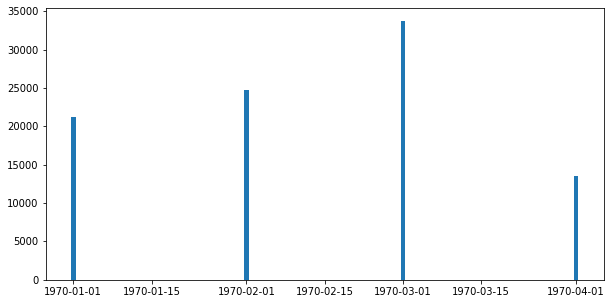

In [7]:
agg_1mo = login.resample('MS', on='login_time').login_time.count().to_frame()
agg_1mo.columns = ['user_num']

plt.figure(figsize=(10,5))
plt.bar(x=agg_1mo.index, height=agg_1mo['user_num']);

- Monthly data shows that the demand increases from January to March but drops quickly in April.

**Patterns of demand by week**

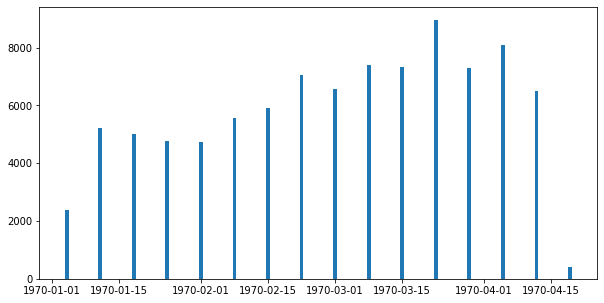

In [8]:
agg_1w = login.resample('w', on='login_time').login_time.count().to_frame()
agg_1w.columns = ['user_num']

plt.figure(figsize=(10,5))
plt.bar(x=agg_1w.index, height=agg_1w['user_num']);

- Weekly data trend follow the monthly data trend.
- there is strong/consistent pattern among weeks in a month.

**Patterns of demand by day**

In [9]:
# Aggregate login counts based on 1 hour
agg_1h = login.resample('H', on='login_time').login_time.count().to_frame()
agg_1h.columns = ['user_num']
agg_1h.head()

,user_num
login_time,
1970-01-01 20:00:00,24
1970-01-01 21:00:00,9
1970-01-01 22:00:00,21
1970-01-01 23:00:00,58
1970-01-02 00:00:00,53


In [10]:
# Extract day of week and day types from login_time
agg_1h = agg_1h.reset_index()
agg_1h['hour'] = agg_1h['login_time'].dt.hour
agg_1h['dayofweek'] = agg_1h['login_time'].dt.dayofweek
agg_1h['day_type'] = 'weekday'
agg_1h.loc[agg_1h['dayofweek']>4,'day_type'] = 'weekend'
agg_1h['dayofweek'] = agg_1h['dayofweek'].map({0: 'Monday', 
                                               1: 'Tuesday', 
                                               2: 'Wednesday', 
                                               3: 'Thursday', 
                                               4:'Friday', 
                                               5: 'Saturday', 
                                               6: 'Sunday'})
agg_1h.head()

,login_time,user_num,hour,dayofweek,day_type
0,1970-01-01 20:00:00,24,20,Thursday,weekday
1,1970-01-01 21:00:00,9,21,Thursday,weekday
2,1970-01-01 22:00:00,21,22,Thursday,weekday
3,1970-01-01 23:00:00,58,23,Thursday,weekday
4,1970-01-02 00:00:00,53,0,Friday,weekday


In [11]:
agg_1h.head()

,login_time,user_num,hour,dayofweek,day_type
0,1970-01-01 20:00:00,24,20,Thursday,weekday
1,1970-01-01 21:00:00,9,21,Thursday,weekday
2,1970-01-01 22:00:00,21,22,Thursday,weekday
3,1970-01-01 23:00:00,58,23,Thursday,weekday
4,1970-01-02 00:00:00,53,0,Friday,weekday


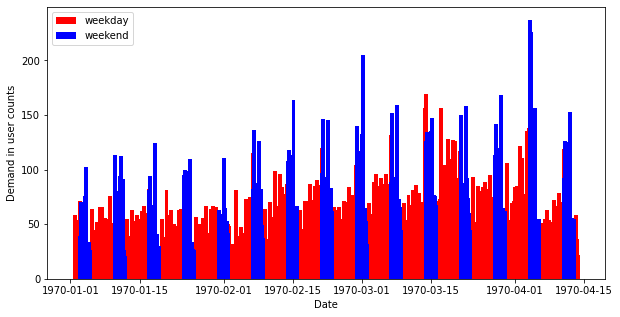

In [12]:
# plot the demand in user counts in weekdays and weekend.
agg_1h_weekday = agg_1h[agg_1h.day_type == 'weekday']
agg_1h_weekend = agg_1h[agg_1h.day_type == 'weekend']

fig, ax = plt.subplots(figsize = (10, 5))
plt.bar(x=agg_1h_weekday.login_time, height=agg_1h_weekday['user_num'], color='r', label='weekday');
plt.bar(x=agg_1h_weekend.login_time, height=agg_1h_weekend['user_num'], color='b', label='weekend');
plt.xlabel('Date')
plt.ylabel('Demand in user counts')
plt.legend()
plt.show();

Findings:
- The demand in weekend is stronger than weekdays by approximately 38.3#
- there is strong/consistent pattern among weeks in a month.

In [13]:
# calculate demand difference between weekdays and weekend.
diff_demand = (agg_1h.groupby('day_type')['user_num'].mean()[1] - agg_1h.groupby('day_type')['user_num'].mean()[0])/agg_1h.groupby('day_type')['user_num'].mean()[1]*100
print(f'The number of users in weekend is higher than that weekdays by {round(diff_demand,1)} %')

The number of users in weekend is higher than that weekdays by 38.3 %


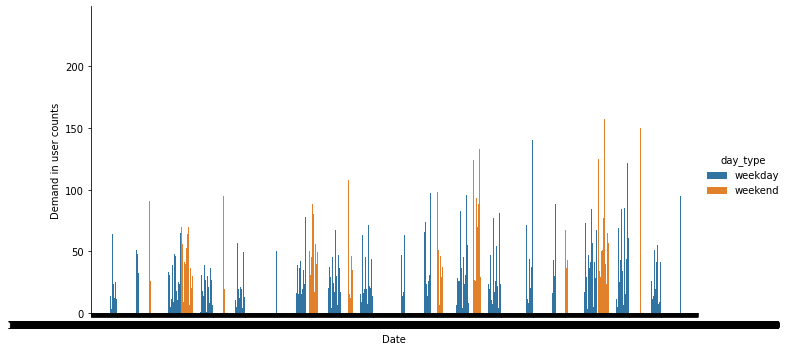

In [14]:
# fig, ax = plt.subplots(figsize = (10, 5))
sns.catplot(x='login_time', y='user_num',data=agg_1h, kind='bar',height=5,
    aspect=2, hue='day_type')
plt.xlabel('Date')
plt.ylabel('Demand in user counts')
plt.show();

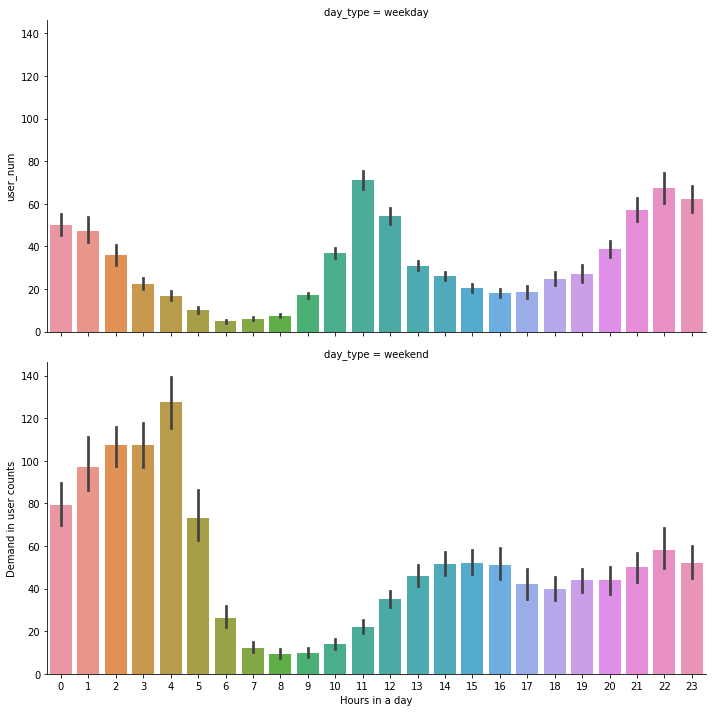

In [15]:
# The number of users / demand in hours in a day, weekday vs weekend
sns.catplot(x='hour', y='user_num',data=agg_1h, kind='bar',height=5,
    aspect=2, row='day_type')
plt.xlabel('Hours in a day')
plt.ylabel('Demand in user counts')
plt.show();

Findings:
- In weekdays, the demand is high from 21:00 to 1:00 and at noon.
- In weekend, the deman is high from 0:00 to 4:00 (weird).
- The trend in each day of a week demonstrates the same observation.

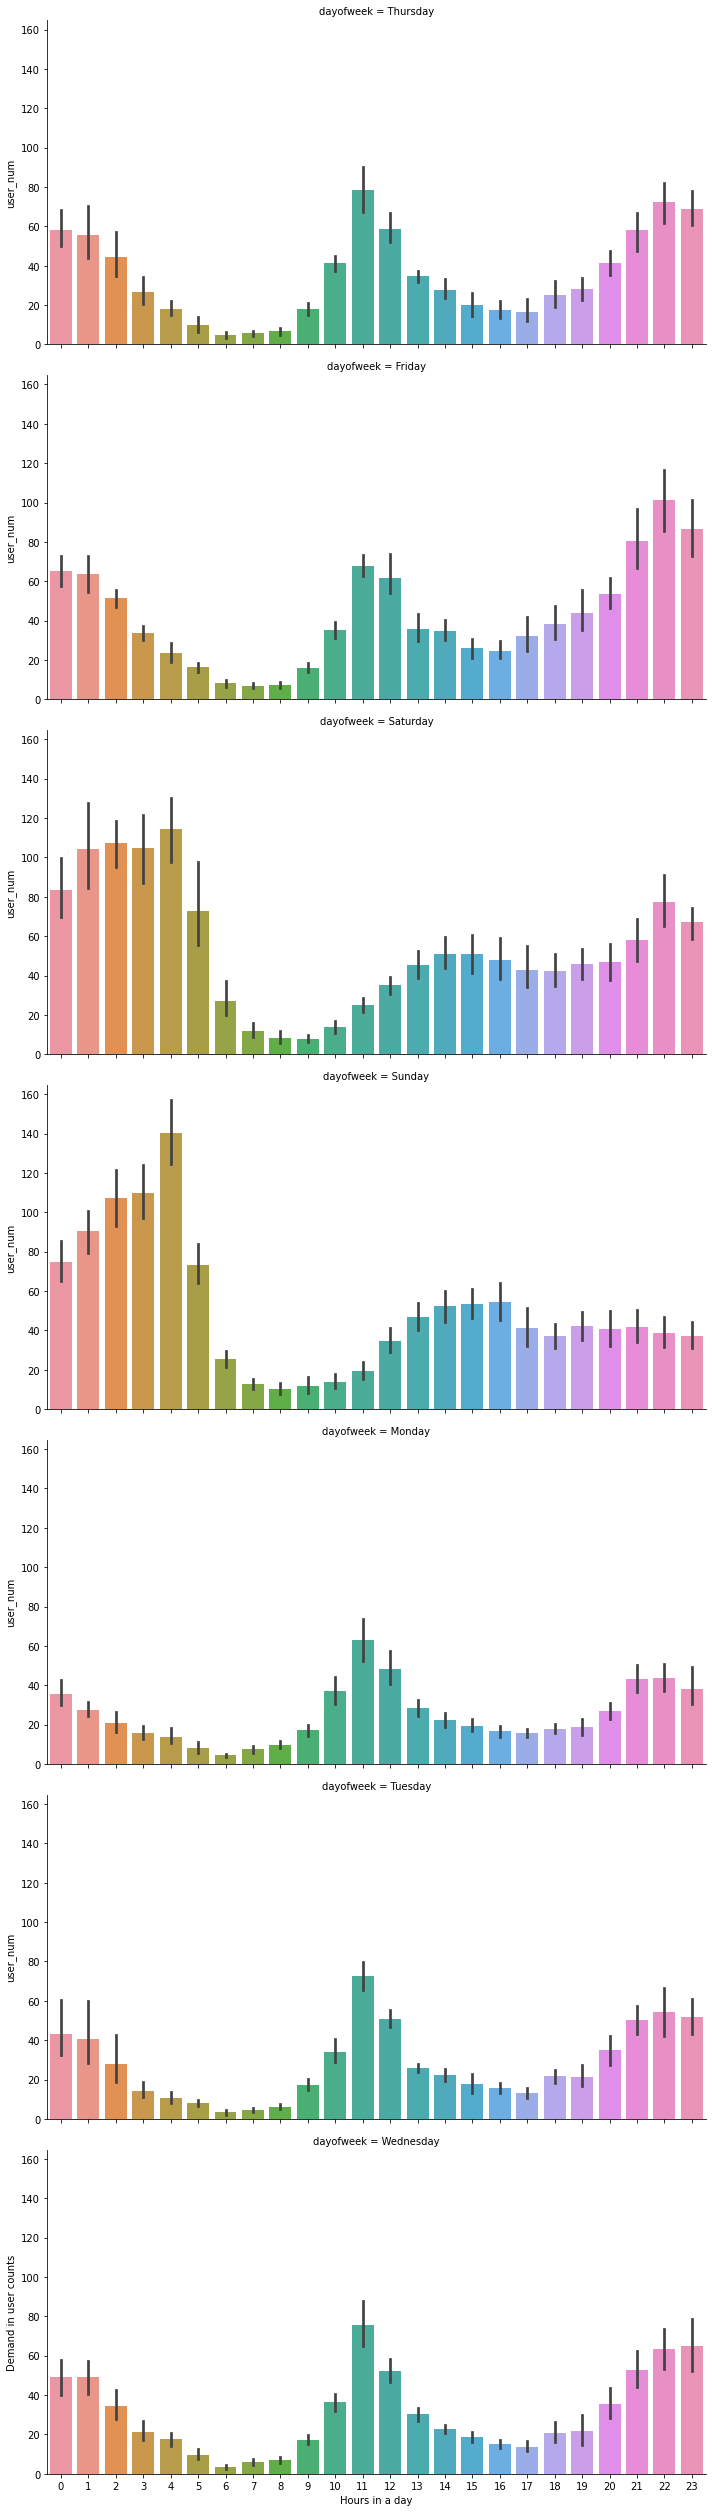

In [16]:
# fig, ax = plt.subplots(figsize = (10, 5))
sns.catplot(x='hour', y='user_num',data=agg_1h, kind='bar',height=5,
    aspect=2, row='dayofweek')
plt.xlabel('Hours in a day')
plt.ylabel('Demand in user counts')
plt.show();

## Part 2 Experiment and Metrics Design<a id='2'></a>

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

- I will chose the traffic volume per week as the key measures of success of this experiment. 
- To avoid the effects of circadian rhythms on experiment, the duration of one week is appropriate to evaluate overall traffic volume.
- If the experiment can makes driver partners to be available in both cities, we expect to have observable increase in traffic volume per week.

2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

*a) how you will implement the experiment*
- The experiment will be condcuted by 8 weeks. 
- controal group (all odd weeks): reimbursing all toll costs. 
- experimental group(all even weeks): no reimbursement.

*b) what statistical test(s) you will conduct to verify the significance of the observation*
- simple regression test to explore the cause-and-effect relationships between the toll costs and the traffic volume per week. 

*c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.*
- a relationship between the toll costs and traffic volume per week may or may not be found based on the results. 
- In the experiment, only the toll costs and traffic volume are considered. More parameters need to be investigated for this city operations. e.g, whether the profit/tax generated by the increased traffic volume will cover the toll costs.
- The experimental duation of 8 weeks may not cover the effects of holidays, seasons, and other long-term factors. 


## Part 3 Predictive modeling<a id='3'></a>

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand `what factors are the best predictors for retention`, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

**Description of features:**

* city: city this user signed up in
* phone: primary device for this user
* signup_date: date of account registration; in the form ‘YYYYMMDD’
* last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
* avg_dist: the average distance in miles per trip taken in the first 30 days after signup
* avg_rating_by_driver: the rider’s average rating over all of their trips
* avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
* surge_pct: the percent of trips taken with surge multiplier > 1
* avg_surge: The average surge multiplier over all of this user’s trips
* trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
* ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE
otherwise
* weekday_pct: the percent of the user’s trips occurring during a weekday

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [86]:
# import dataset
ultimate = pd.read_json('ultimate_data_challenge.json')
ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [87]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [88]:
#convert date string to datatime formate
ultimate['signup_date'] = pd.to_datetime(ultimate['signup_date'])
ultimate['last_trip_date'] = pd.to_datetime(ultimate['last_trip_date'])

In [89]:
# we consider a user retained if they were “active” in the preceding 30 days.
# Theoretically, we can calcuate the retained users for every month (i.e. window).
# For simplicity, we use the last day 2014-07-01 to determine the retained users for the latest month.

ultimate['retained_user'] = 0
ultimate.loc[(ultimate['last_trip_date'].max() - ultimate['last_trip_date']).dt.days <= 30,'retained_user'] = 1
print(f'The fraction the retained users is {round(ultimate.retained_user.sum()/ultimate.shape[0],2)}')

The fraction the retained users is 0.38


In [90]:
ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [92]:
ultimate.isnull().sum()/ultimate.shape[0]*100

city                       0.000
trips_in_first_30_days     0.000
signup_date                0.000
avg_rating_of_driver      16.244
avg_surge                  0.000
last_trip_date             0.000
phone                      0.792
surge_pct                  0.000
ultimate_black_user        0.000
weekday_pct                0.000
avg_dist                   0.000
avg_rating_by_driver       0.402
retained_user              0.000
dtype: float64

* there are missing data for avg_rating_of_driver, avg_rating_by_driver, and phone.
* For phone feature, we will drop the missing data
* As the missing data for avg_rating_of_driver is about 16.2% of total data, we will use the mean of avg_rating_of_driver to replace the missing data.
* We also use the mean of avg_rating_by_driver to replace its missing data

In [93]:
ultimate = ultimate[ultimate['phone'].notna()]
ultimate['avg_rating_of_driver'] = ultimate['avg_rating_of_driver'].fillna(ultimate.avg_rating_of_driver.mean())
ultimate['avg_rating_by_driver'] = ultimate['avg_rating_by_driver'].fillna(ultimate.avg_rating_by_driver.mean())

In [94]:
ultimate.isnull().sum()/ultimate.shape[0]*100

city                      0.0
trips_in_first_30_days    0.0
signup_date               0.0
avg_rating_of_driver      0.0
avg_surge                 0.0
last_trip_date            0.0
phone                     0.0
surge_pct                 0.0
ultimate_black_user       0.0
weekday_pct               0.0
avg_dist                  0.0
avg_rating_by_driver      0.0
retained_user             0.0
dtype: float64

**EDA**

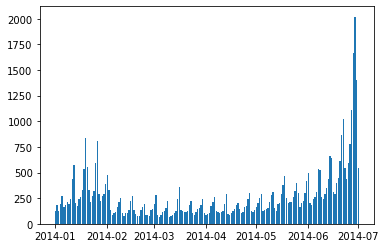

In [95]:
plt.bar(ultimate['last_trip_date'].value_counts().index, ultimate['last_trip_date'].value_counts().values)
plt.show()

Retention rate needs to define the window. For simplicity, we use all the dates for calculation.

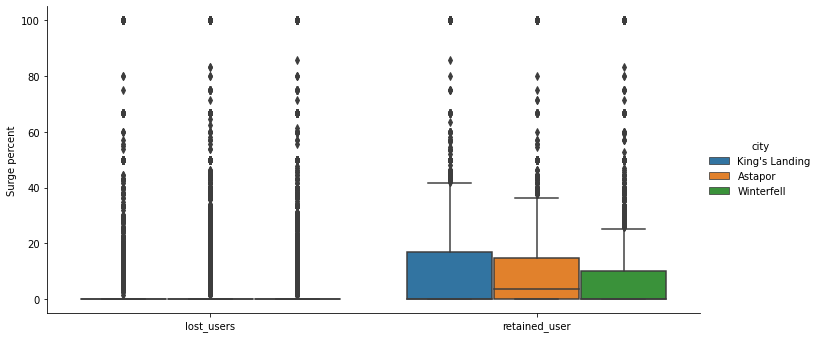

In [102]:
ax = sns.catplot(x='retained_user', y='surge_pct', data=ultimate, kind='box',height=5,
    aspect=2, hue='city')
ax.set(xlabel=None)

plt.xticks(ticks=[0,1], labels = ['lost_users','retained_user'])
plt.ylabel('Surge percent')
plt.show();

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

* we will use the calculated retained_user column to represent whether or not a user will be active in their 6th month on the system
    * 0 -- inactive
    * 1 -- active

In [103]:
ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [117]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

**Train/Test Split**

Create X, y variables for train/test split. 

In [144]:
data = ultimate.copy()
data['ultimate_black_user'] = data['ultimate_black_user'].map({True: 1, False: 0})
data['phone'] = data['phone'].map({'iPhone': 1, 'Android': 0})

In [145]:
data['signup_date'] = data['signup_date'].dt.year*10000+data['signup_date'].dt.month*100+data['signup_date'].dt.day
data['last_trip_date'] = data['last_trip_date'].dt.year*10000+data['last_trip_date'].dt.month*100+data['last_trip_date'].dt.day

In [146]:
data = pd.get_dummies(data)

In [147]:
X = data.drop(columns = ['retained_user', 'last_trip_date'])
y = data['retained_user']
print(X.shape,'\n', y.shape)

(49604, 13) 
 (49604,)


In [148]:
X.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell
0,4,20140125,4.7,1.10,1,15.4,1,46.2,3.67,5.0,0,1,0
1,0,20140129,5.0,1.00,0,0.0,0,50.0,8.26,5.0,1,0,0
2,3,20140106,4.3,1.00,1,0.0,0,100.0,0.77,5.0,1,0,0
3,9,20140110,4.6,1.14,1,20.0,1,80.0,2.36,4.9,0,1,0
4,14,20140127,4.4,1.19,0,11.8,0,82.4,3.13,4.9,0,0,1


We will split the data with test_size = 0.25, i.e., training uses 75% of data.

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=47)
print(X_train.shape,'\n', X_test.shape)

(37203, 13) 
 (12401, 13)


**Modeling**

Random forest classifer is applied to predict the retention because:
- it is robust to outliers, scalable, and able to naturally model non-linear decision boundaries thanks to their hierarchical structure.
- Data Scaling is not necessary for Ramdorm Forest
- it provide the importance of features, which is critical to figuring out bussiness strategies.

In [150]:
classifiers = RandomForestClassifier(random_state=42)
classifiers.fit(X_train, y_train)
y_pred = classifiers.predict(X_test)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
score = classifiers.score(X_test, y_test)

In [157]:
feature_importance = pd.DataFrame(classifiers.feature_names_in_, columns=['feature'])
feature_importance['importance'] = classifiers.feature_importances_
feature_importance.sort_values('importance', ascending = False)

,feature,importance
8,avg_dist,0.221740
7,weekday_pct,0.125233
1,signup_date,0.112689
9,avg_rating_by_driver,0.106615
5,surge_pct,0.076945
2,avg_rating_of_driver,0.074367
0,trips_in_first_30_days,0.072791
3,avg_surge,0.062576
11,city_King's Landing,0.046945
4,phone,0.036847


* The most important feature is the average distance in miles per trip taken in the first 30 days after signup.

In [152]:
precision, recall, score

(0.7640082314125194, 0.766954277880816, 0.766954277880816)

In [154]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      7733
           1       0.71      0.65      0.68      4668

    accuracy                           0.77     12401
   macro avg       0.75      0.74      0.75     12401
weighted avg       0.76      0.77      0.76     12401



- The classification report shows the validity of model predicting the retention. 
- The model performance may be further improved by feature engineering. Other classifiers may also be worthy of trying to find a better model for this dataset.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

Feature importance indicate top 2 features deciding the retetion:

* avg_dist: the average distance in miles per trip taken in the first 30 days after signup
* weekday_pct: the percent of the user’s trips occurring during a weekday

To improve long term rider retention, Ultimate may
* enhance new customers's experience or use of Ultimate by deals/rewards/etc.
* realocate resources to weekdays to improve user's trips/distance.